# Exploratory Data Analysis (EDA) - Amazon Prime

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#### Reading Data

In [2]:
df = pd.read_csv('C:\\Users\\prabh\\OneDrive\\Desktop\\ML Course Notes\\Lecture 5\\amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
df.rename(columns={'listed_in':'categories'},inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


#### Drop the columns that we won't involve in analysis

In [4]:
df.drop(['show_id'], axis = 1, inplace = True)
df.drop(['description'], axis = 1, inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [5]:
df.shape

(9668, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   categories    9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [7]:
df.describe(include = object)

,type,title,director,cast,country,date_added,rating,duration,categories
count,9668,9668,7585,8435,672,155,9331,9668,9668
unique,2,9668,5773,7927,86,84,24,219,518
top,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",13+,1 Season,Drama
freq,7814,1,113,56,253,14,2117,1342,986


### **Data Cleaning**

#### Handling Duplicate Values

In [8]:
df.duplicated().sum()

0

#### Handling Missing Values

In [9]:
df.isnull().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
categories         0
dtype: int64

In [10]:
df['director'].nunique()

5773

In [11]:
df['director'] = df['director'].fillna('unknown')
df['director'].isnull().sum()

0

In [12]:
df['cast'] = df['cast'].fillna('unknown')
df['cast'].isnull().sum()

0

In [13]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

In [14]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating'].isnull().sum()

0

In [15]:
# ffill() - any NaN value in the 'date_added' column will be replaced with the last valid observation in the column.
# It is useful to ensure continuity in the data, to maintain the chronological order of the data, used for time-series analysis or visualizations.

df['date_added']= df['date_added'].ffill()
df['date_added'].isnull().sum()

0

In [16]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [17]:
df['date_added']= pd.to_datetime(df['date_added'], format='%B %d, %Y')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"


### **Exploratory Data Analysis**

#### Analyzing 'Type' Feature

In [18]:
# Number of unique values in the 'type' column

df['type'].nunique()

2

In [19]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [20]:
df.type.value_counts(normalize=True)

type
Movie      0.808233
TV Show    0.191767
Name: proportion, dtype: float64

<Axes: xlabel='type', ylabel='count'>

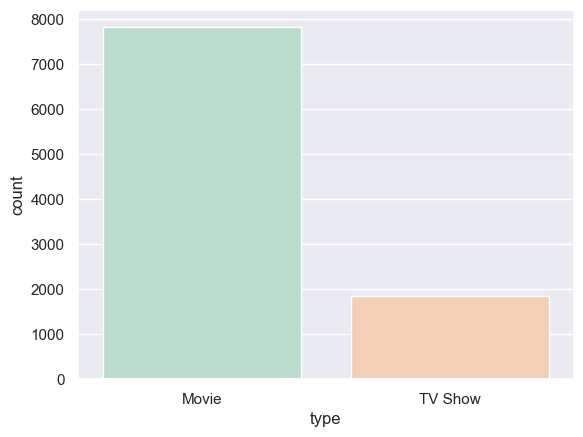

In [21]:
sns.countplot(x = df['type'], hue=df['type'], palette="Pastel2")

##### Most of the shows released on Amazon Prime are movies rather than TV shows, with movies accounting for 80.82% and TV shows for 19.18%.

### Analyzing 'Rating' Feature

<Axes: xlabel='rating', ylabel='count'>

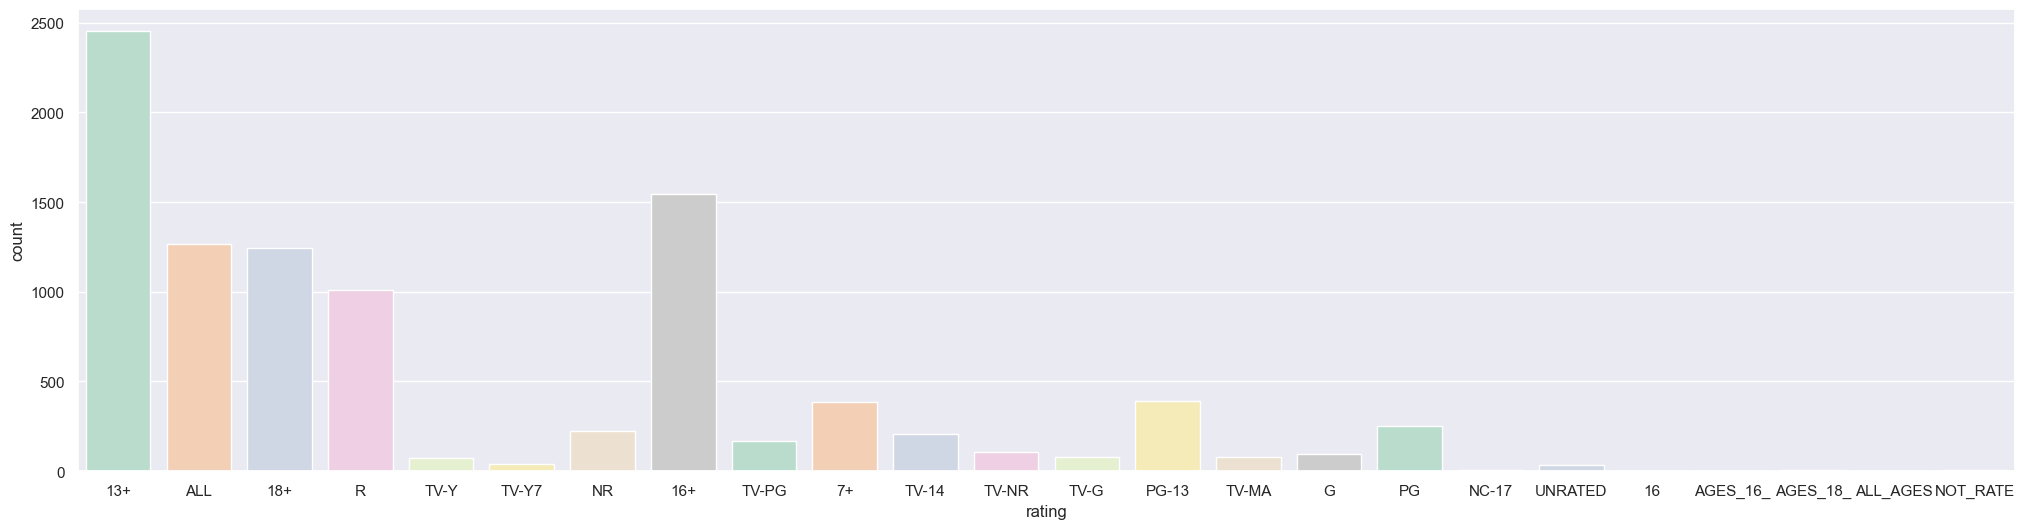

In [22]:
plt.figure(figsize=(25,6))
sns.countplot(x=df['rating'], hue=df['rating'], palette="Pastel2")

##### The shows most added on Amazon Prime had a rating of 13+.

### Analyzing 'Categories' Feature

<Axes: xlabel='categories', ylabel='count'>

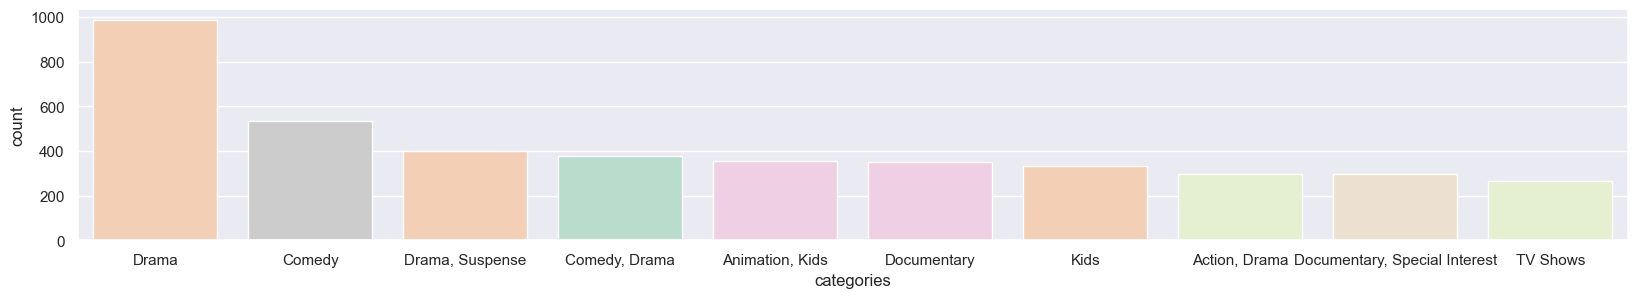

In [23]:
plt.figure(figsize=(20, 3))
sns.countplot(x=df['categories'], hue=df['categories'], order=df['categories'].value_counts().nlargest(10).index.tolist(), palette="Pastel2")

##### The drama category is the show category that has been released the most on Amazon Prime.

#### Analyzing 'country' feature

In [24]:
# The number of unique values in the 'country' column

df['country'].nunique()

87

In [25]:
country_counts = df['country'].value_counts()
country_counts

country
unknown                                  8996
United States                             253
India                                     229
United Kingdom                             28
Canada                                     16
                                         ... 
United States, Germany, Brazil, Italy       1
South Africa                                1
Australia, United States, Germany           1
Germany, Austria, United States             1
Italy, Spain                                1
Name: count, Length: 87, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'United Kingdom, United States'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Canada, United States'),
  Text(8, 0, 'United States, United Kingdom')])

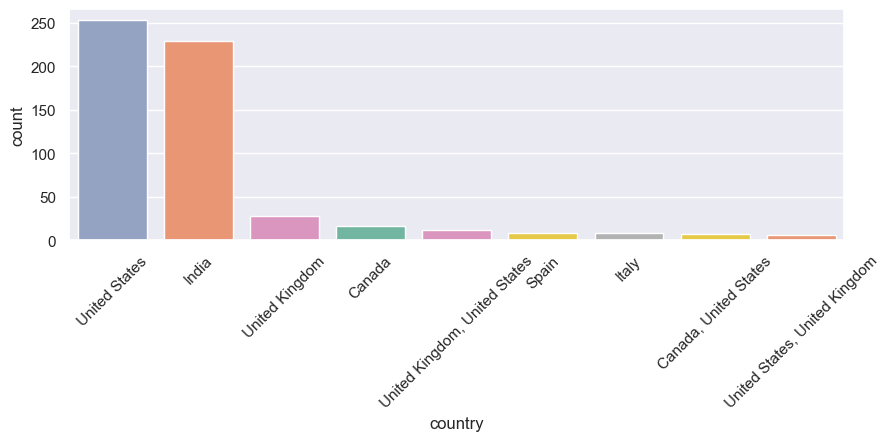

In [26]:
plt.figure(figsize=(10, 3))
top_countries = country_counts.nlargest(10)[1:]
top_countries
sns.countplot(x=df['country'], order=top_countries.index, hue=df['country'], palette='Set2')
plt.xticks(rotation=45)

##### Based on the data, the top 3 countries that released the most TV shows and movies on Amazon Prime, respectively, were the United States, India, and the United Kingdom.

#### Analyzing 'director' feature

In [27]:
# The number of unique values in the 'country' column

df['director'].nunique()

5774

In [28]:
director_counts = df['director'].value_counts()
director_counts

director
unknown                  2083
Mark Knight               113
Cannis Holder              61
Moonbug Entertainment      37
Jay Chapman                34
                         ... 
Karyn Kusama                1
K. Subash                   1
Robert Cuffley              1
J. Sabarish                 1
Steve Barker                1
Name: count, Length: 5774, dtype: int64

<Axes: xlabel='director', ylabel='count'>

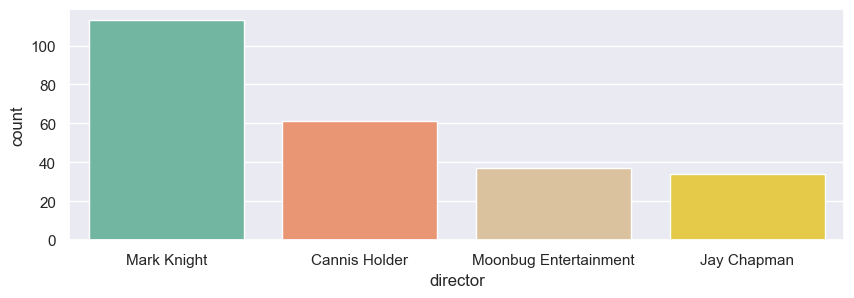

In [29]:
plt.figure(figsize=(10, 3))
top_director = director_counts.nlargest(5)[1:]
sns.countplot(x=df['director'], order=top_director.index, hue=df['director'], palette='Set2')

##### Mark Night produced the most shows released on Amazon Prime.

#### Analyzing 'date_added' feature

(array([18718., 18748., 18779., 18809., 18840., 18871., 18901.]),
 [Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18871.0, 0, '2021-09'),
  Text(18901.0, 0, '2021-10')])

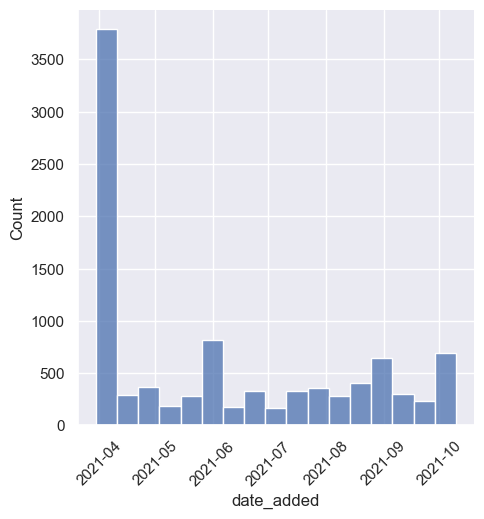

In [30]:
sns.displot(data = df ,x="date_added")
plt.xticks(rotation = 45)

#### Analyzing 'release_year' feature

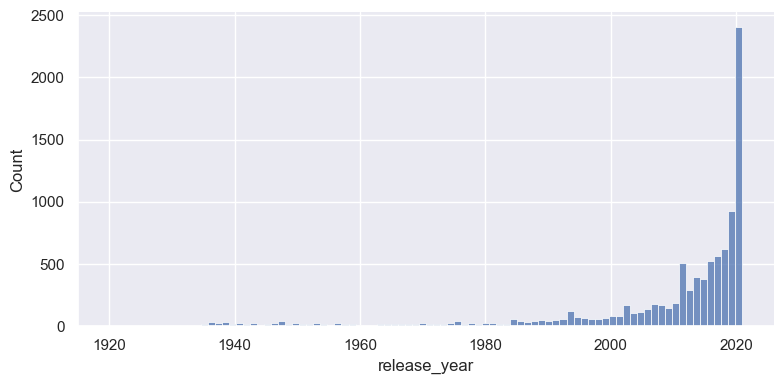

In [31]:
sns.displot(data = df ,x="release_year", height=4, aspect=2)

##### Shows that were released the most on Amazon Prime were from the year 2021.

### **Conclusion**

##### •Amazon Prime Video uploads more movies than TV shows.
##### •Most uploaded shows on Amazon Prime Video are from the US.
##### •The trend for the last 5 years is that more movies are always uploaded compared to TV shows.
##### •Amazon Prime Video has the most uploads in the drama show category.
##### •Shows uploaded on Amazon Prime Video are mostly directed by Mark Knight.
##### •The most uploaded show rating on Amazon Prime Video is Rating 13+ in the drama show category.